In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import os
from sklearn.model_selection import GridSearchCV
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pickle

In [2]:
Categories=["cats","dogs"]
print("Type y to give categories or type 'n' to go with classification of Cats and Dogs");
while(True):
    check=input()
    if(check=='n' or check=='y'):
        break
    print("Please give a valid input (y/n)")
if(check=='y'):
    print("Enter How Many types of Images do you want to classify")
    n=int(input())
    Categories=[]
    print(f'please enter {n} names')
    for i in range(n):
        name=input()
        Categories.append(name)
    print(f" Note:- If not drive Please upload all the {n} category images in google collab with the same names as given in categories")

Type y to give categories or type 'n' to go with classification of Cats and Dogs
n


In [3]:
flat_data_arr=[]
target_arr=[]
datadir=r"C:\Users\Lenovo\Downloads\archive (6)\train"
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_train=pd.DataFrame(flat_data)
df_train['Target']=target
df_train

loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.664553,0.699847,0.688082,0.649015,0.684309,0.672545,0.652139,0.687491,0.675629,0.650999,...,0.782066,0.797752,0.809517,0.783753,0.799439,0.811204,0.779394,0.795081,0.806845,0
1,0.913725,0.941176,0.980392,0.913725,0.941176,0.980392,0.913725,0.941176,0.980392,0.913725,...,0.079354,0.075433,0.095041,0.076021,0.072099,0.091707,0.074941,0.071020,0.090627,0
2,0.070589,0.074510,0.094118,0.072550,0.076471,0.096079,0.076470,0.080392,0.099999,0.078431,...,0.042927,0.042927,0.050771,0.039425,0.039425,0.047269,0.039216,0.039216,0.047059,0
3,0.942242,0.924688,0.893890,0.931961,0.916732,0.869833,0.926855,0.914589,0.850521,0.923275,...,0.936996,0.936809,0.937260,0.939368,0.936354,0.932111,0.943336,0.929229,0.916308,0
4,0.352155,0.328626,0.242351,0.307931,0.284401,0.198127,0.371901,0.348371,0.262097,0.561875,...,0.244662,0.232889,0.205451,0.280780,0.269015,0.241564,0.206308,0.194543,0.167092,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
553,0.987365,0.975600,0.955295,0.987260,0.975495,0.951778,0.987959,0.976194,0.955542,0.988213,...,0.900805,0.838807,0.734748,0.970215,0.940119,0.887666,0.976864,0.958984,0.916184,1
554,0.379018,0.382940,0.571175,0.439914,0.443836,0.632071,0.496738,0.500660,0.688895,0.527126,...,0.434862,0.390917,0.212101,0.415686,0.400000,0.211765,0.415686,0.400000,0.211765,1
555,0.173440,0.219261,0.116332,0.161538,0.205053,0.114617,0.146513,0.195216,0.107680,0.141764,...,0.673572,0.588025,0.497396,0.652734,0.576511,0.488388,0.634822,0.552990,0.481588,1


In [4]:
x1=df_train.iloc[0:150,:-1]
x2=df_train.iloc[250:400,:-1]
x_train_frame=[x1,x2]
x_train=pd.concat(x_train_frame)
y1=df_train.iloc[0:150,-1]
y2=df_train.iloc[250:400,-1]
y_train_frame=[y1,y2]
y_train=pd.concat(y_train_frame)
print('Splitted Successfully')

Splitted Successfully


In [5]:
x_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.664553,0.699847,0.688082,0.649015,0.684309,0.672545,0.652139,0.687491,0.675629,0.650999,...,0.808546,0.782066,0.797752,0.809517,0.783753,0.799439,0.811204,0.779394,0.795081,0.806845
1,0.913725,0.941176,0.980392,0.913725,0.941176,0.980392,0.913725,0.941176,0.980392,0.913725,...,0.098616,0.079354,0.075433,0.095041,0.076021,0.072099,0.091707,0.074941,0.071020,0.090627
2,0.070589,0.074510,0.094118,0.072550,0.076471,0.096079,0.076470,0.080392,0.099999,0.078431,...,0.050980,0.042927,0.042927,0.050771,0.039425,0.039425,0.047269,0.039216,0.039216,0.047059
3,0.942242,0.924688,0.893890,0.931961,0.916732,0.869833,0.926855,0.914589,0.850521,0.923275,...,0.937897,0.936996,0.936809,0.937260,0.939368,0.936354,0.932111,0.943336,0.929229,0.916308
4,0.352155,0.328626,0.242351,0.307931,0.284401,0.198127,0.371901,0.348371,0.262097,0.561875,...,0.049114,0.244662,0.232889,0.205451,0.280780,0.269015,0.241564,0.206308,0.194543,0.167092


In [6]:
y_train.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [7]:
y_train.value_counts()

0    179
1    121
Name: Target, dtype: int64

In [8]:
flat_data_arr=[]
target_arr=[]
datadir=r"C:\Users\Lenovo\Downloads\archive (6)\test"
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_test=pd.DataFrame(flat_data)
df_test['Target']=target
df_test


loading... category : cats
loaded category:cats successfully
loading... category : dogs
loaded category:dogs successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.367356,0.550487,0.610539,0.422373,0.564135,0.622592,0.457410,0.572009,0.616929,0.464057,...,0.228007,0.182224,0.162964,0.226590,0.172904,0.158392,0.226956,0.168149,0.156376,0
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.033031,0.014166,0.003286,0.032156,0.028020,0.020135,0.025416,0.021494,0.013651,0
3,0.788935,0.684034,0.522134,0.786897,0.680500,0.498389,0.690132,0.630676,0.480956,0.605710,...,0.754795,0.677338,0.541698,0.690623,0.603425,0.446182,0.695335,0.619334,0.463979,0
4,0.813153,0.833305,0.840980,0.814567,0.834719,0.842394,0.806535,0.826687,0.834363,0.818445,...,0.144494,0.226855,0.168011,0.152586,0.234939,0.176116,0.151794,0.234147,0.175323,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.255179,0.317164,0.207298,0.246564,0.316602,0.213517,0.225567,0.299391,0.216565,0.212490,...,0.575063,0.289463,0.277393,0.666403,0.348591,0.297203,0.712691,0.388277,0.316823,1
136,0.265010,0.312069,0.225795,0.274089,0.321148,0.234873,0.360405,0.407464,0.321189,0.409287,...,0.494319,0.497384,0.459362,0.494781,0.498688,0.462202,0.504560,0.500465,0.472541,1
137,0.793502,0.671443,0.543091,0.780656,0.628852,0.474770,0.767930,0.608017,0.447716,0.790871,...,0.797953,0.672070,0.497984,0.803082,0.681208,0.508537,0.803690,0.678609,0.505929,1
138,0.749102,0.756945,0.804004,0.753878,0.761721,0.808779,0.757728,0.765571,0.812630,0.764199,...,0.257425,0.277033,0.300529,0.377863,0.383260,0.389736,0.103504,0.103504,0.103504,1


In [9]:
x_test=df_test.iloc[0:51,:-1]
y_test=df_test.iloc[0:51,-1]
print('Splitted Successfully')

Splitted Successfully


In [10]:
x_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.367356,0.550487,0.610539,0.422373,0.564135,0.622592,0.457410,0.572009,0.616929,0.464057,...,0.168631,0.228007,0.182224,0.162964,0.226590,0.172904,0.158392,0.226956,0.168149,0.156376
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030536,0.033031,0.014166,0.003286,0.032156,0.028020,0.020135,0.025416,0.021494,0.013651
3,0.788935,0.684034,0.522134,0.786897,0.680500,0.498389,0.690132,0.630676,0.480956,0.605710,...,0.570430,0.754795,0.677338,0.541698,0.690623,0.603425,0.446182,0.695335,0.619334,0.463979
4,0.813153,0.833305,0.840980,0.814567,0.834719,0.842394,0.806535,0.826687,0.834363,0.818445,...,0.165192,0.144494,0.226855,0.168011,0.152586,0.234939,0.176116,0.151794,0.234147,0.175323


In [11]:
y_test.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [12]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [13]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0])

In [14]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [15]:
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 96.07843137254902% accurate


In [16]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of ImageC:\Users\Lenovo\OneDrive\Desktop\cat_158.jpg


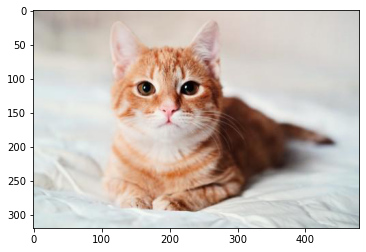

cats = 79.6415683039689%
dogs = 20.35843169603108%
The predicted image is : cats
Is the image a cats ?(y/n)
y
Thank you for your feedback


In [19]:
model=pickle.load(open('img_model.p','rb'))
url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
    b=input()
    if(b=="y" or b=="n"):
        break
    print("please enter either y or n")
if(b=='n'):
    print("What is the image?")
    for i in range(len(Categories)):
        print(f"Enter {i} for {Categories[i]}")
    k=int(input())
    while(k<0 or k>=len(Categories)):
        print(f"Please enter a valid number between 0-{len(Categories)-1}")
        k=int(input())
    print("Please wait for a while for the model to learn from this image :)")
    flat_arr=flat_data_arr.copy()
    tar_arr=target_arr.copy()
    tar_arr.append(k)
    flat_arr.extend(l)
    tar_arr=np.array(tar_arr)
    flat_df=np.array(flat_arr)
    df1=pd.DataFrame(flat_df)
    df1['Target']=tar_arr
    model1=GridSearchCV(svc,param_grid)
    x1=df1.iloc[:,:-1]
    y1=df1.iloc[:,-1]
    x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
    d={}
    for i in model.best_params_:
        d[i]=[model.best_params_[i]]
    model1=GridSearchCV(svc,d)
    model1.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test1)
    print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
    pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")